# SVM 
Support vector machine testing

## Loading Essentials and Helper Functions 
This is a lolt of imports and you may not use all of them but some of them may be useful, and looking into the documentation can help you learn (eg sklearn.metrics can help give you an idea of how to asses the usefulness of a particular model!)

In [1]:
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [3]:
kepler = pd.read_csv('cleanData2.csv')
kepler.drop('Unnamed: 0', axis = 1,inplace=True)

In [4]:
kepler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   koi_pdisposition  9564 non-null   int64  
 1   koi_score         8054 non-null   float64
 2   koi_fpflag_nt     9564 non-null   float64
 3   koi_fpflag_ss     9564 non-null   float64
 4   koi_fpflag_co     9564 non-null   float64
 5   koi_fpflag_ec     9564 non-null   float64
 6   koi_period        9564 non-null   float64
 7   koi_time0bk       9564 non-null   float64
 8   koi_impact        9201 non-null   float64
 9   koi_duration      9564 non-null   float64
 10  koi_depth         9201 non-null   float64
 11  koi_prad          9201 non-null   float64
 12  koi_teq           9201 non-null   float64
 13  koi_insol         9243 non-null   float64
 14  koi_model_snr     9201 non-null   float64
 15  koi_tce_plnt_num  9218 non-null   float64
 16  koi_steff         9201 non-null   float64


In [5]:
kepler.describe()

,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,9564.000000,8.054000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.564000e+03,9.201000e+03,9564.000000,...,9.201000e+03,9.243000e+03,9.201000e+03,9.218000e+03,9.201000e+03,9.201000e+03,9.201000e+03,9.564000e+03,9.564000e+03,9.563000e+03
mean,0.529904,5.646230e-17,1.545304e-16,-5.943478e-18,-5.943478e-18,-8.915216e-18,2.303098e-17,-1.069826e-16,-7.722451e-19,0.000000,...,9.266941e-18,4.458669e-17,-4.942369e-17,6.783224e-17,-2.316735e-16,1.668049e-16,3.552328e-17,1.887426e-15,-7.459064e-16,-3.343556e-16
std,0.499131,1.000062e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000054e+00,1.000052,...,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,0.000000,-1.008242e+00,-4.814969e-01,-5.490005e-01,-4.920141e-01,-3.693330e-01,-5.651530e-02,-6.724150e-01,-2.195229e-01,-0.860674,...,-1.238328e+00,-4.865533e-02,-3.265983e-01,-3.666519e-01,-3.822499e+00,-9.855119e+00,-2.643628e-01,-2.561141e+00,-2.008593e+00,-5.268323e+00
25%,0.000000,-1.008242e+00,-4.814969e-01,-5.490005e-01,-4.920141e-01,-3.693330e-01,-5.464830e-02,-4.921053e-01,-1.606933e-01,-0.492003,...,-6.380741e-01,-4.852876e-02,-3.115185e-01,-3.666519e-01,-4.980120e-01,-2.130380e-01,-1.468473e-01,-7.131981e-01,-8.423255e-01,-5.952219e-01
50%,1.000000,-3.078837e-01,-4.814969e-01,-5.490005e-01,-4.920141e-01,-3.693330e-01,-4.938923e-02,-4.263930e-01,-5.915980e-02,-0.282637,...,-2.421870e-01,-4.776586e-02,-2.976953e-01,-3.666519e-01,7.552160e-02,2.955350e-01,-1.189374e-01,4.216215e-02,-3.691408e-02,1.843500e-01
75%,1.000000,1.084445e+00,-4.814969e-01,-5.490005e-01,-4.920141e-01,-3.693330e-01,-2.619080e-02,6.642606e-02,4.595718e-02,0.101201,...,3.428852e-01,-4.318855e-02,-2.285793e-01,-3.666519e-01,5.084956e-01,5.382630e-01,-6.262785e-02,7.970356e-01,8.064799e-01,7.632544e-01
max,1.000000,1.088639e+00,2.076857e+00,1.821492e+00,2.032462e+00,2.707584e+00,9.734218e+01,1.923480e+01,2.988395e+01,20.539943,...,1.586073e+01,6.871910e+01,1.105204e+01,1.016700e+01,1.278739e+01,2.436165e+00,3.724250e+01,2.026809e+00,2.367522e+00,4.142121e+00


In [6]:
kepler.drop('koi_score', inplace=True, axis=1)
kepler.dropna(inplace=True)

### Save the label column as a separate array and then drop it from the dataframe. 

In [7]:
label = "koi_pdisposition"
y = kepler[label]
x = kepler.drop(label, axis=1)

### Split the data into train, test, target, and target_test

In [8]:
train, test, target, target_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
# SVM
svm = SVC(probability=True)
svm.fit(train, target)

SVC(probability=True)

In [10]:
# Report on model Accuracy
svm_pred = svm.predict(test)
metrics.accuracy_score(target_test, svm_pred)

0.9932923420905534

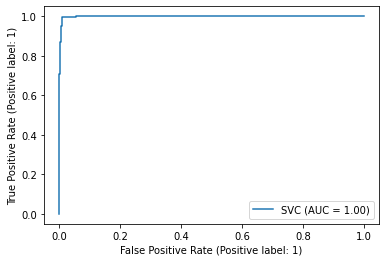

In [11]:
metrics.plot_roc_curve(svm, test, target_test)

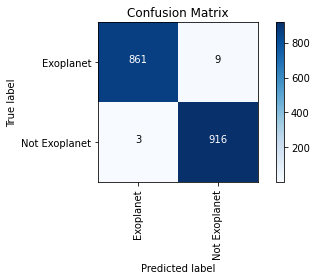

In [12]:
draw_confusion_matrix(target_test, svm_pred, ['Exoplanet', 'Not Exoplanet'])

## Try again without flag columns

In [13]:
flags = [col for col in kepler.columns if 'flag' in col]
kepler2 = kepler.drop(flags, axis=1)
label = "koi_pdisposition"
y2 = kepler2[label]
x2 = kepler2.drop(label, axis=1)

In [14]:
train, test, target, target_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [15]:
svm = SVC(probability=True)
svm.fit(train, target)

SVC(probability=True)

In [16]:
# Report on model Accuracy
svm_pred = svm.predict(test)
metrics.accuracy_score(target_test, svm_pred)

0.8144214645053103

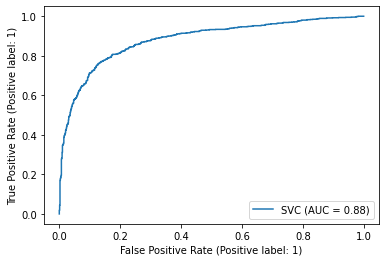

In [17]:
metrics.plot_roc_curve(svm, test, target_test)

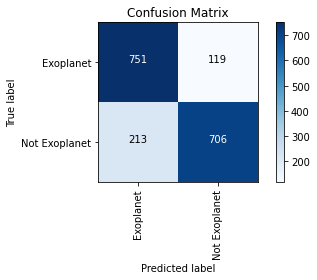

In [18]:
draw_confusion_matrix(target_test, svm_pred, ['Exoplanet', 'Not Exoplanet'])